$$PART-1$$
COINTEGRATION AND CORRELATION IS EXPLINED USING RANDOM PLOT AND ANOTHER RANDOM PLOT


In [2]:
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

import matplotlib.pyplot as plt

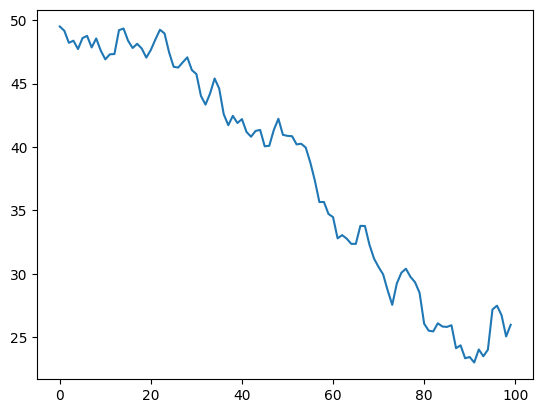

In [3]:
X_returns = np.random.normal(0,1,100)
X=pd.Series(np.cumsum(X_returns),name='x')+50
X.plot();

5.9521202474862705e-09


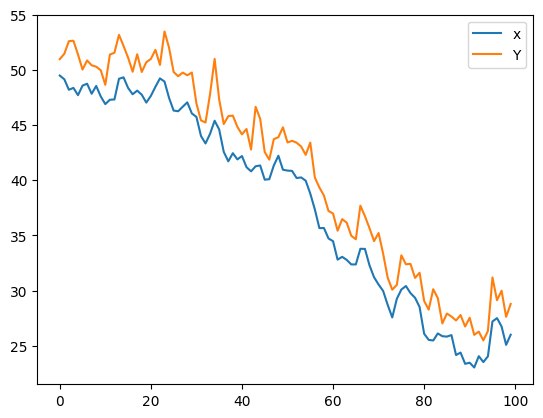

In [4]:
noise=np.random.normal(0,1,100)
Y=X+3+noise
Y.name= 'Y'
pd.concat([X,Y],axis=1).plot();
score, pvalue,_ =coint(X,Y)
print(pvalue)

As pvalue of very very close to zero, these 2 plots are cointegrated.

Lower the p value higher are the 2 securities related, here the p value are for some random normal distributions.

if p value is < 0.05 they are likely cointegrated.

Checking for mean reverting behaviour......

plot is mean reverting


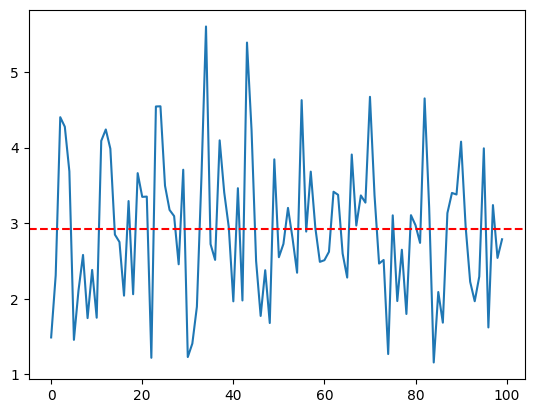

In [5]:
(Y-X).plot()
plt.axhline((Y-X).mean(),color='red',linestyle='--')
print('plot is mean reverting')

NOW CORRELATION VS COINTEGRATION


<Axes: >

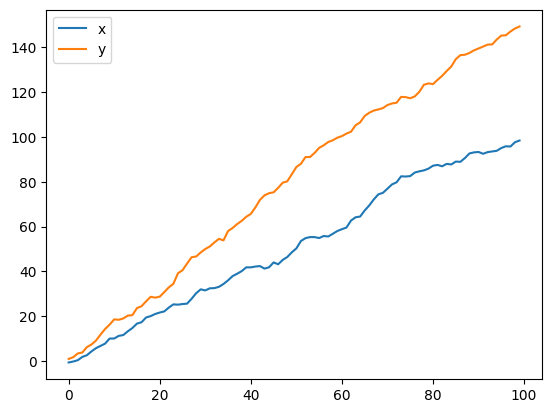

In [6]:
X_return=np.random.normal(1,1,100)
Y_return=np.random.normal(1.5,1,100)

X_diverging=pd.Series(np.cumsum(X_return), name='x')
Y_diverging=pd.Series(np.cumsum(Y_return), name='y')

pd.concat([X_diverging,Y_diverging], axis=1).plot()

In [ ]:
print( 'Correlation: '+ str(X_diverging.corr(Y_diverging)))
score, pvalue,_=coint(X_diverging,Y_diverging)  
print('Cointegration: '+str(pvalue))

Correlation: 0.9927925317394638
Cointegration: 0.7282726000026024


The correlation is very high but a High cointegration pvalue suggests that these are not cointegrated. which is true as they are diverging.

$$PART-1$$
BACK TO TOPIC, TESTING THE 2 RANDOM PLOTS

<Axes: >

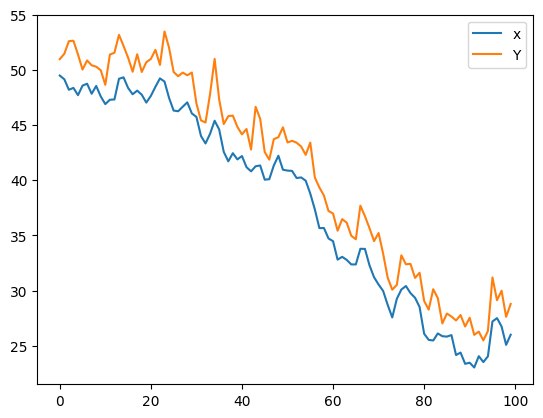

In [8]:
pd.concat([X,Y],axis=1).plot()

These 2 securities are cointegrated and whenever they are farthest apart we short on the above and long on the blow and when in the future the distance between the 2 securities are lower, u would have lost money on one part and gained somewat more in the other so net profit is positive. these are called HEDGED POSITIONS.

In [ ]:
!pip install pandas-datareader

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

$$PART-2$$
COINTEGRATING NIFTY BANK STOCKS, AIM IS TO FIND A MEAN REVERTING STOCK PAIR WITH LOW PVALUE AND HIGH CORRELATION.

In [ ]:
###########  RUN  THIS ############################

#THIS WILL BRING IN NIFTY BANK STOCKS INTO A DIRECTORY IN CSV FORMAT
 

import yfinance as yf
import pandas as pd
import os

# List of NIFTY Bank stocks (symbols)
nifty_stocks = [
    "MARUTI.NS",
    "TATAMOTORS.NS",
    "M&M.NS",
    "HEROMOTOCO.NS",
    "BAJAJ-AUTO.NS",
    "EICHERMOT.NS",
    "TVSMOTOR.NS",
    "ASHOKLEY.NS",
    "BALKRISIND.NS",
    "AMARAJABAT.NS",
    "EXIDEIND.NS",
    "ESCORTS.NS",
    "SONACOMS.NS",
    "BHARATFORG.NS",
    "MRF.NS",
    "APOLLOTYRE.NS",
    "CEATLTD.NS",
    "MOTHERSON.NS"
]

# Define the start and end date for historical data
start_date = '2023-04-01'
end_date = '2024-02-01'

# Directory to save the CSV files
output_directory = 'nifty_auto_data'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Fetch historical data for each stock and save it to a CSV file
for stock in nifty_stocks:
    print(f"Downloading data for {stock}...")
    data = yf.download(stock, start=start_date, end=end_date)
    if not data.empty:
        output_file = os.path.join(output_directory, f"{stock.replace('.NS', '')}_historical_data.csv")
        data.to_csv(output_file)
        print(f"Saved {stock} data to {output_file}")
    else:
        print(f"No data found for {stock}")

print("Data download complete.")


UPDATING THE DATE FORMAT IN THE CSV FILES TO DD-MM-YYYY

In [11]:
import os
import pandas as pd

# Directory containing your CSV files
directory = 'nifty_auto_data'  # Replace with your directory path

# List all CSV files in the directory
file_names = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Function to change date format in the first column
def change_date_format(file_path):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Check if the first column is 'Date' and convert date format
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.strftime('%d-%m-%Y')

        # Save the updated DataFrame back to the CSV file
        df.to_csv(file_path, index=False)
        print(f"Updated date format in {file_path}")

# Iterate through all CSV files and update the date format
for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    change_date_format(file_path)

print("Date format update complete.")


Updated date format in nifty_auto_data\APOLLOTYRE_historical_data.csv
Updated date format in nifty_auto_data\ASHOKLEY_historical_data.csv
Updated date format in nifty_auto_data\BAJAJ-AUTO_historical_data.csv
Updated date format in nifty_auto_data\BALKRISIND_historical_data.csv
Updated date format in nifty_auto_data\BHARATFORG_historical_data.csv
Updated date format in nifty_auto_data\CEATLTD_historical_data.csv
Updated date format in nifty_auto_data\EICHERMOT_historical_data.csv
Updated date format in nifty_auto_data\ESCORTS_historical_data.csv
Updated date format in nifty_auto_data\EXIDEIND_historical_data.csv
Updated date format in nifty_auto_data\HEROMOTOCO_historical_data.csv
Updated date format in nifty_auto_data\M&M_historical_data.csv
Updated date format in nifty_auto_data\MARUTI_historical_data.csv
Updated date format in nifty_auto_data\MOTHERSON_historical_data.csv
Updated date format in nifty_auto_data\MRF_historical_data.csv
Updated date format in nifty_auto_data\SONACOMS_hi

$$o$$
STORING COINTEGRATION RESULTS OF EVERY POSSIBLE PAIR(WITHOUT REPITITION) IN A SEPERATE CSV FILE

In [13]:
import os
import pandas as pd
from itertools import product
from statsmodels.tsa.stattools import coint

# Directory containing your CSV files
directory = 'nifty_auto_data'  # Replace with your directory path

# List all CSV files in the directory
file_names = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Function to perform cointegration test and return p-value
def perform_cointegration_test(file1, file2):
    try:
        # Load the data
        df1 = pd.read_csv(os.path.join(directory, file1))
        df2 = pd.read_csv(os.path.join(directory, file2))

        # Parse the 'Date' column as datetime with the specified format
        df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
        df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y')

        # Sort by date in case the data is not sorted
        df1.sort_values('Date', inplace=True)
        df2.sort_values('Date', inplace=True)

        # Merge the two dataframes on the Date column
        merged_df = pd.merge(df1[['Date', 'Close']], df2[['Date', 'Close']], on='Date', suffixes=('_file1', '_file2'))

        # Drop rows with NaN values
        merged_df.dropna(inplace=True)

        # Perform the cointegration test
        score, p_value, _ = coint(merged_df['Close_file1'], merged_df['Close_file2'])

        return p_value
    except Exception as e:
        print(f"Error processing {file1} and {file2}: {str(e)}")
        return None

# List to store results
results = []

# Use a set to track processed pairs
processed_pairs = set()

# Iterate through all unique combinations of file names
for file1, file2 in product(file_names, repeat=2):
    if file1 != file2:
        # Ensure unique pair (file1, file2) or (file2, file1) is not processed twice
        pair = tuple(sorted((file1, file2)))
        if pair not in processed_pairs:
            # Perform cointegration test
            p_value = perform_cointegration_test(file1, file2)
            
            if p_value is not None:
                # Append results to list
                results.append((file1, file2, p_value))
                processed_pairs.add(pair)

# Create a DataFrame from results
results_df = pd.DataFrame(results, columns=['File1', 'File2', 'P-Value'])

# Save results to CSV file
results_df.to_csv('cointegration_results.csv', index=False)

print("Cointegration p-values stored in 'cointegration_results.csv'")


Cointegration p-values stored in 'cointegration_results.csv'


SAVING SIGNIFICANT PAIRS OF COINTEGRATION (VALUE<0.05) 

AND PLOTTING A HEATMAP TO VISUALISE THE COINTEGRATION DATA

Significant Cointegration Pairs (p-value < 0.05):
                               File1                           File2   P-Value
45   BALKRISIND_historical_data.csv  BHARATFORG_historical_data.csv  0.043050
48   BALKRISIND_historical_data.csv     ESCORTS_historical_data.csv  0.021105
51   BALKRISIND_historical_data.csv         M&M_historical_data.csv  0.016932
52   BALKRISIND_historical_data.csv      MARUTI_historical_data.csv  0.001138
76      CEATLTD_historical_data.csv   MOTHERSON_historical_data.csv  0.026109
113  HEROMOTOCO_historical_data.csv  TATAMOTORS_historical_data.csv  0.048167
131         MRF_historical_data.csv  TATAMOTORS_historical_data.csv  0.047050
134    SONACOMS_historical_data.csv    TVSMOTOR_historical_data.csv  0.022841


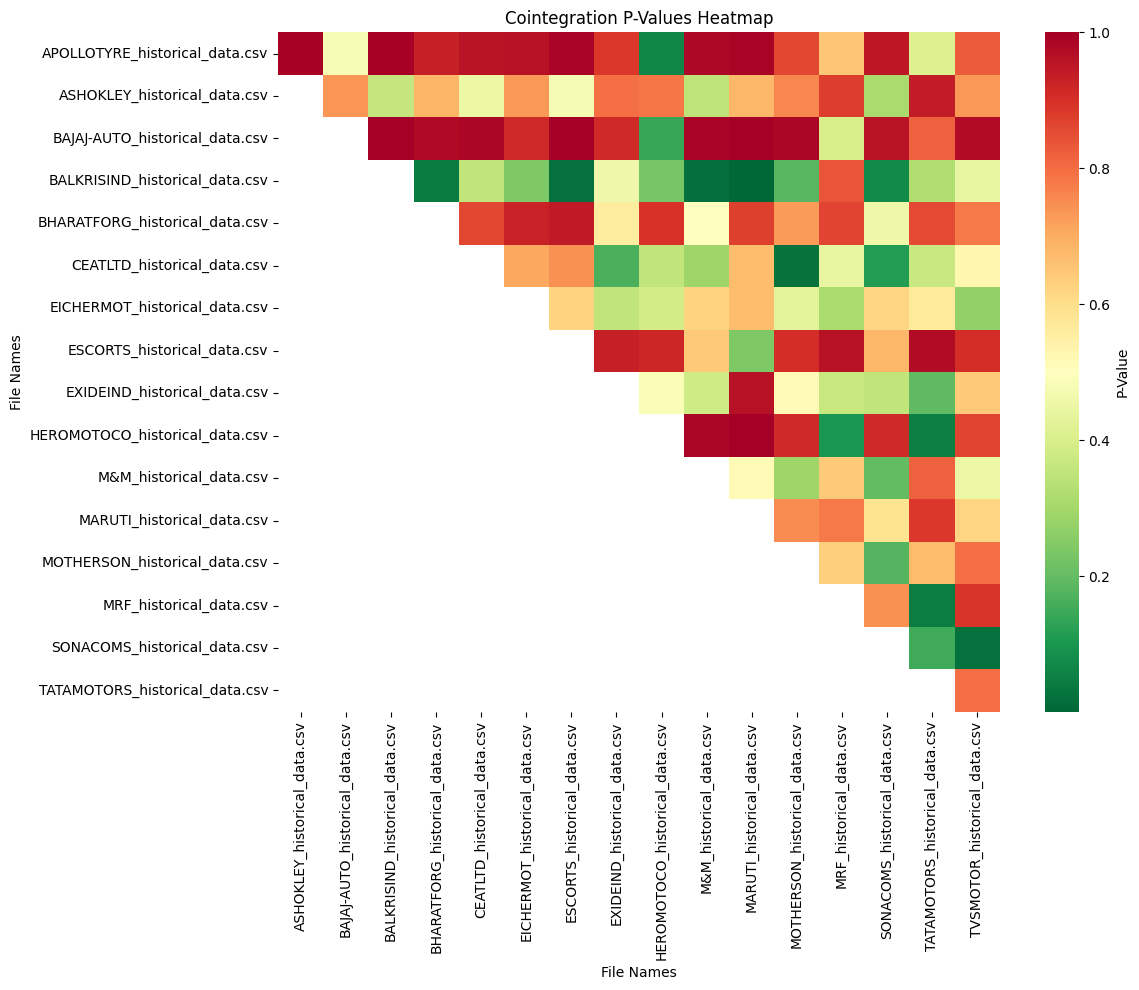

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file containing the results
csv_file = 'cointegration_results.csv'  # Replace with your CSV file path
results_df = pd.read_csv(csv_file)

# Filter pairs with p-value < 0.05
significant_pairs = results_df[results_df['P-Value'] < 0.05]

# Save significant pairs to a new CSV file
significant_pairs.to_csv('signifcoint.csv', index=False)

# Display significant pairs
print("Significant Cointegration Pairs (p-value < 0.05):\n", significant_pairs)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(results_df.pivot(index='File1', columns='File2', values='P-Value'),
            annot=False, cmap='RdYlGn_r', fmt='.4f', cbar_kws={'label': 'P-Value'})
plt.title('Cointegration P-Values Heatmap')
plt.xlabel('File Names')
plt.ylabel('File Names')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('cointegration_heatmap.png')  # Save the heatmap as a PNG file
plt.show()

IDENTIFYING HIGH CORRELATION STOCKS AND STORING IN CSV FILE


In [37]:
import os
import pandas as pd

# Directory containing your CSV files
directory = 'nifty_auto_data'  # Replace with your directory path

# List all CSV files in the directory
file_names = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Function to calculate the correlation between the closing prices of two stocks
def calculate_correlation(file1, file2):
    # Load the data
    df1 = pd.read_csv(os.path.join(directory, file1))
    df2 = pd.read_csv(os.path.join(directory, file2))

    # Parse the 'Date' column as datetime with the specified format
    df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
    df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y')

    # Sort by date in case the data is not sorted
    df1.sort_values('Date', inplace=True)
    df2.sort_values('Date', inplace=True)

    # Merge the two dataframes on the Date column
    merged_df = pd.merge(df1[['Date', 'Close']], df2[['Date', 'Close']], on='Date', suffixes=('_file1', '_file2'))

    # Drop rows with NaN values
    merged_df.dropna(inplace=True)

    # Calculate the correlation
    correlation = merged_df['Close_file1'].corr(merged_df['Close_file2'])

    return correlation

# List to store results
results = []

# Iterate through all unique combinations of file names
for i, file1 in enumerate(file_names):
    for j, file2 in enumerate(file_names):
        if i < j:  # Ensure each pair is considered only once
            # Calculate correlation
            correlation = calculate_correlation(file1, file2)

            # Filter correlations greater than 0.9
            if correlation > 0.7:
                # Append results to list
                results.append((file1, file2, correlation))

# Create a DataFrame from results
results_df = pd.DataFrame(results, columns=['File1', 'File2', 'Correlation'])

# Save filtered results to CSV file
results_df.to_csv('highcorRes.csv', index=False)

print("High correlation data stored in 'highcorRes.csv'")


High correlation data stored in 'highcorRes.csv'


INTERSECTION BETWEEN THE 2 FILES, TO IDENTIFY STOCK PAIRS WITH HIGH CORRELATION VLAUE AND LOW COINTEGRATION P VALUE.

In [38]:
import pandas as pd

# Paths to the CSV files
file1_path = 'signifcoint.csv'  # Replace with your file path
file2_path = 'highcorRes.csv'  # Replace with your file path

# Read the CSV files into DataFrames
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Merge the DataFrames to find common rows
# Change 'on' parameter if you want to merge on specific columns
common_df = pd.merge(df1, df2, how='inner')

# Save the common rows to a new CSV file
output_path = 'Significant_Pairs.csv'  # Replace with your desired output file path
common_df.to_csv(output_path, index=False)

print(f"Common data stored in '{output_path}'")

Common data stored in 'Significant_Pairs.csv'


$$PART-2$$
$$MEAN-REVERTING-BEHAVIOUR$$

VISUALISING THE OUTPUT SIGNIFICANT PAIRS, TO CHECK FOR THEIR MEAN REVERTING BEHAVIOUR.

Cointegration test score: -0.8889880892946397
p-value: 0.9219615479016228
Critical values: [-3.95120383 -3.36639459 -3.06540862]


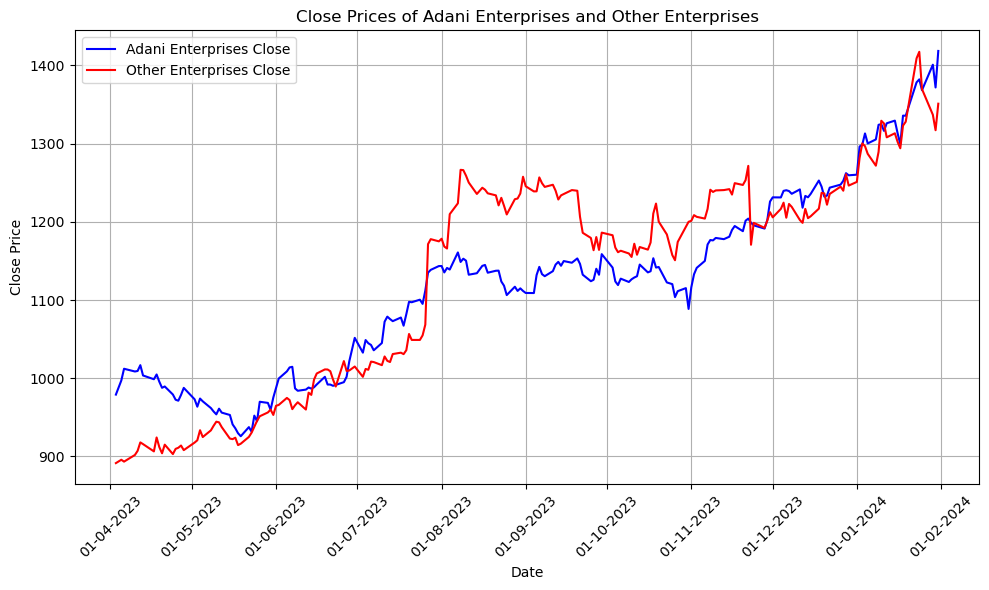

{'score': -0.8889880892946397, 'p_value': 0.9219615479016228, 'critical_values': array([-3.95120383, -3.36639459, -3.06540862])}
correlation results are: 
0.913164503686928


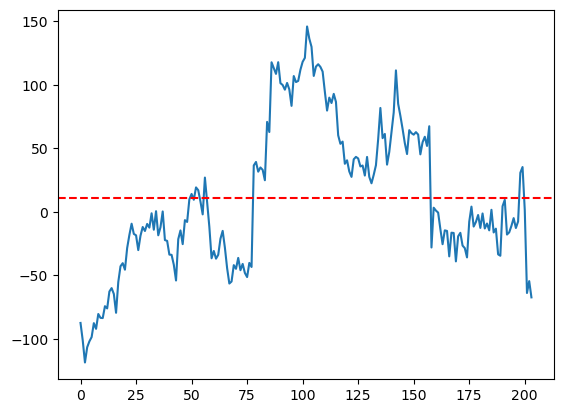

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from statsmodels.tsa.stattools import coint

# Load the CSV files
file_path = 'nifty_auto_data/SUNPHARMA_historical_data.csv'  # Replace with your file path
df = pd.read_csv(file_path)
df_other = pd.read_csv('nifty_auto_data/CIPLA_historical_data.csv')  # Replace with your second file path

# Parse the 'Date' column as datetime with the specified format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df_other['Date'] = pd.to_datetime(df_other['Date'], format='%d-%m-%Y')

# Sort by date in case the data is not sorted
df.sort_values('Date', inplace=True)
df_other.sort_values('Date', inplace=True)

# Merge the two dataframes on the Date column
merged_df = pd.merge(df[['Date', 'Close']], df_other[['Date', 'Close']], on='Date', suffixes=('_adani', '_other'))

# Check for and handle missing or infinite values
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df.dropna(subset=['Close_adani', 'Close_other'], inplace=True)

# Perform the cointegration test
score, p_value, critical_values = coint(merged_df['Close_adani'], merged_df['Close_other'])

# Print the results
print(f'Cointegration test score: {score}')
print(f'p-value: {p_value}')
print(f'Critical values: {critical_values}')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the time series
ax.plot(merged_df['Date'], merged_df['Close_adani'], label='Adani Enterprises Close', linestyle='-', color='b')
ax.plot(merged_df['Date'], merged_df['Close_other'], label='Other Enterprises Close', linestyle='-', color='r')

# Set the title and labels
ax.set_title('Close Prices of Adani Enterprises and Other Enterprises')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.grid(True)

# Improve date formatting on x-axis
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Add legend
ax.legend()

# Adjust layout for better fit
plt.tight_layout()

# Store the figure in a variable
my_figure = fig

# Show the plot
plt.show()

# Save the figure to a file
my_figure.savefig('cointegration_plot.png')

# Store the cointegration results
cointegration_results = {
    'score': score,
    'p_value': p_value,
    'critical_values': critical_values
}

correlation_=merged_df['Close_adani'].corr(merged_df['Close_other'])

# Print or store the results as needed
print(cointegration_results)
print("correlation results are: ")
print(correlation_)







X2=merged_df['Close_adani']
Y2=merged_df['Close_other']

(Y2-X2).plot()
plt.axhline((Y2-X2).mean(),color='red',linestyle='--')


Cointegration test score: -1.8221820962578124
p-value: 0.6188861914215759
Critical values: [-3.95120383 -3.36639459 -3.06540862]


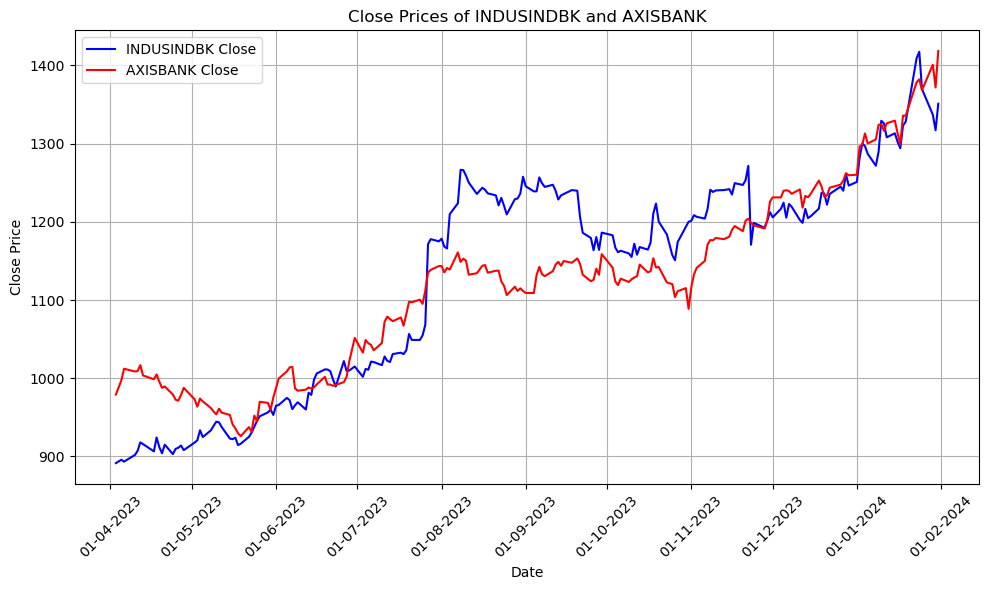

{'score': -1.8221820962578124, 'p_value': 0.6188861914215759, 'critical_values': array([-3.95120383, -3.36639459, -3.06540862])}
correlation results are: 
0.9131645036869281


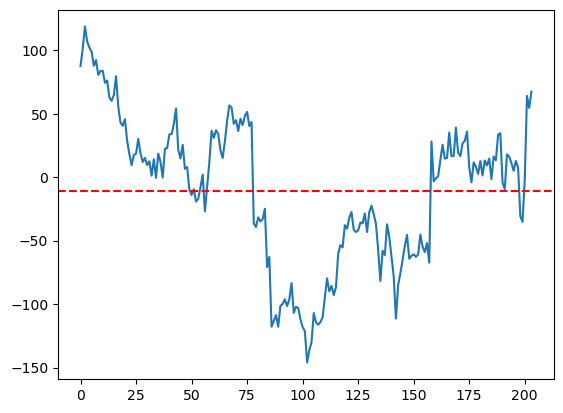

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from statsmodels.tsa.stattools import coint

# Load the CSV files
file_path = 'nifty_auto_data/CIPLA_historical_data.csv'  # Replace with your file path
df = pd.read_csv(file_path)
df_other = pd.read_csv('nifty_auto_data/SUNPHARMA_historical_data.csv')  # Replace with your second file path

# Parse the 'Date' column as datetime with the specified format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df_other['Date'] = pd.to_datetime(df_other['Date'], format='%d-%m-%Y')

# Sort by date in case the data is not sorted
df.sort_values('Date', inplace=True)
df_other.sort_values('Date', inplace=True)

# Merge the two dataframes on the Date column
merged_df = pd.merge(df[['Date', 'Close']], df_other[['Date', 'Close']], on='Date', suffixes=('_adani', '_other'))

# Check for and handle missing or infinite values
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df.dropna(subset=['Close_adani', 'Close_other'], inplace=True)

# Perform the cointegration test
score, p_value, critical_values = coint(merged_df['Close_adani'], merged_df['Close_other'])

# Print the results
print(f'Cointegration test score: {score}')
print(f'p-value: {p_value}')
print(f'Critical values: {critical_values}')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the time series
ax.plot(merged_df['Date'], merged_df['Close_adani'], label='INDUSINDBK Close', linestyle='-', color='b')
ax.plot(merged_df['Date'], merged_df['Close_other'], label='AXISBANK Close', linestyle='-', color='r')

# Set the title and labels
ax.set_title('Close Prices of INDUSINDBK and AXISBANK')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.grid(True)

# Improve date formatting on x-axis
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Add legend
ax.legend()

# Adjust layout for better fit
plt.tight_layout()

# Store the figure in a variable
my_figure = fig

# Show the plot
plt.show()

# Save the figure to a file
my_figure.savefig('cointegration_plot.png')

# Store the cointegration results
cointegration_results = {
    'score': score,
    'p_value': p_value,
    'critical_values': critical_values
}

correlation_=merged_df['Close_adani'].corr(merged_df['Close_other'])

# Print or store the results as needed
print(cointegration_results)
print("correlation results are: ")
print(correlation_)



X2=merged_df['Close_adani']
Y2=merged_df['Close_other']

(Y2-X2).plot()
plt.axhline((Y2-X2).mean(),color='red',linestyle='--')


$SELECTING$
the second plot as it seems more mean reverting
$INDUSUNDBK$
&
$AXISBANK$

NOW GENERATING SIGNALS WHENEVER THE PRICE DEVIATES A CERTAIN THRESHHOLD ABOVE/BELOW THE MEAN.

In [42]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Step 1: Read the CSV files
file_path_stock1 = 'nifty_auto_data/CIPLA_historical_data.csv'  # Replace with your file path for Stock 1
file_path_stock2 = 'nifty_auto_data/SUNPHARMA_historical_data.csv'  # Replace with your file path for Stock 2

# Assuming the CSV files have columns 'Date' and 'Price'
data_stock1 = pd.read_csv(file_path_stock1, parse_dates=['Date'])
data_stock2 = pd.read_csv(file_path_stock2, parse_dates=['Date'])

# Rename the columns for clarity
data_stock1.rename(columns={'Close': 'StockA'}, inplace=True)
data_stock2.rename(columns={'Close': 'StockB'}, inplace=True)

# Step 2: Merge the DataFrames on Date
data = pd.merge(data_stock1, data_stock2, on='Date')

# Step 3: Calculate the Hedge Ratio (Beta)
X = data['StockB']
Y = data['StockA']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
beta = model.params['StockB']

# Step 4: Calculate the Spread
data['Spread'] = data['StockA'] - beta * data['StockB']

# Step 5: Compute the Z-Score of the Spread
lookback = 30  # You can adjust the lookback period
data['Spread_Mean'] = data['Spread'].rolling(window=lookback).mean()
data['Spread_Std'] = data['Spread'].rolling(window=lookback).std()
data['Z-Score'] = (data['Spread'] - data['Spread_Mean']) / data['Spread_Std']

# Step 6: Define Entry and Exit Signals
entry_threshold = 2
exit_threshold = 0.5

data['Long'] = (data['Z-Score'] < -entry_threshold)
data['Short'] = (data['Z-Score'] > entry_threshold)
data['Exit'] = (data['Z-Score'].abs() < exit_threshold)

# Step 7: Implement the Trading Strategy
# Initialize positions
data['Position'] = 0
long_position = 0
short_position = 0

for i in range(1, len(data)):
    if data['Long'][i] and not long_position:
        data['Position'][i] = 1
        long_position = 1
        short_position = 0
    elif data['Short'][i] and not short_position:
        data['Position'][i] = -1
        short_position = 1
        long_position = 0
    elif data['Exit'][i]:
        data['Position'][i] = 0
        long_position = 0
        short_position = 0
    else:
        data['Position'][i] = data['Position'][i-1]

# Step 8: Calculate returns
data['Strategy_Returns'] = data['Position'].shift(1) * (data['StockA'].pct_change() - beta * data['StockB'].pct_change())

# Calculate cumulative returns
data['Cumulative_Returns'] = (1 + data['Strategy_Returns']).cumprod()

# Display results
print(data[['Date', 'StockA', 'StockB', 'Spread', 'Z-Score', 'Position', 'Strategy_Returns', 'Cumulative_Returns']].tail())

# Save results to CSV
output_file_path = 'outputfile.csv'  # Replace with your desired output path
data.to_csv(output_file_path, index=False)


           Date       StockA       StockB      Spread   Z-Score  Position  \
199  24-01-2024  1417.349976  1382.099976 -119.723649  2.346367        -1   
200  25-01-2024  1369.650024  1368.300049 -152.076300  0.118756         0   
201  29-01-2024  1336.849976  1400.849976 -221.076070 -3.412349         1   
202  30-01-2024  1317.099976  1371.750000 -208.463140 -2.394204         1   
203  31-01-2024  1351.000000  1418.449951 -226.499491 -2.713536         1   

     Strategy_Returns  Cumulative_Returns  
199         -0.002860            1.058810  
200          0.022550            1.082686  
201         -0.000000            1.082686  
202          0.008329            1.091703  
203         -0.012123            1.078469  


C:\Users\aryn3\AppData\Local\Temp\ipykernel_48384\1804574369.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Position'][i] = data['Position'][i-1]
C:\Users\aryn3\AppData\Local\Temp\ipykernel_48384\1804574369.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Position'][i] = data['Position'][i-1]
C:\Users\aryn3\AppData\Local\Temp\ipykernel_48384\1804574369.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pos

THE FILE outputfile.CSV HAS ALL BUY SELL SIGNALS GENERATED AND THE PROFIT FROM THEM MENTIONED TOGETHER.


below is the taken trades, in a csv file

In [43]:
import pandas as pd
import numpy as np

# Load data
stock1 = pd.read_csv('nifty_auto_data/CIPLA_historical_data.csv', parse_dates=['Date'], dayfirst=True)
stock2 = pd.read_csv('nifty_auto_data/SUNPHARMA_historical_data.csv', parse_dates=['Date'], dayfirst=True)

# Align dates
data = pd.merge(stock1[['Date', 'Close']], stock2[['Date', 'Close']], on='Date', suffixes=('_1', '_2'))

# Calculate spread
data['Spread'] = data['Close_1'] - data['Close_2']

# Calculate mean spread
data['Spread_Mean'] = data['Spread'].rolling(window=30).mean()

# Generate buy/sell signals based on 150 points deviation from mean
data['Signal'] = 0
data.loc[data['Spread'] > data['Spread_Mean'] + 50, 'Signal'] = -1  # Sell Spread
data.loc[data['Spread'] < data['Spread_Mean'] - 50, 'Signal'] = 1   # Buy Spread

# Initialize positions
data['Position'] = 0

# Track position status
position = 0

for i in range(len(data)):
    if data.loc[i, 'Signal'] == 1 and position == 0:
        # Open long position
        data.loc[i, 'Position'] = 1
        position = 1
    elif data.loc[i, 'Signal'] == -1 and position == 0:
        # Open short position
        data.loc[i, 'Position'] = -1
        position = -1
    elif abs(data.loc[i, 'Spread'] - data.loc[i, 'Spread_Mean']) < 10 and position != 0:
        # Close position
        data.loc[i, 'Position'] = 0
        position = 0
    else:
        data.loc[i, 'Position'] = position

# Calculate daily returns
data['Return_1'] = data['Close_1'].pct_change()
data['Return_2'] = data['Close_2'].pct_change()

# Calculate strategy returns
data['Strategy_Return'] = data['Position'].shift() * (data['Return_1'] - data['Return_2'])

# Calculate cumulative returns
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()

# Initialize trading log
trades = []
position = 0
entry_date = None
entry_price_spread = None

for index, row in data.iterrows():
    if row['Signal'] == 1 and position == 0:
        # Open long position
        position = 1
        entry_date = row['Date']
        entry_price_spread = row['Spread']
    elif row['Signal'] == -1 and position == 0:
        # Open short position
        position = -1
        entry_date = row['Date']
        entry_price_spread = row['Spread']
    elif abs(row['Spread'] - row['Spread_Mean']) < 1 and position != 0:
        # Close position
        exit_date = row['Date']
        exit_price_spread = row['Spread']
        profit = (exit_price_spread - entry_price_spread) * position
        trades.append([entry_date, exit_date, entry_price_spread, exit_price_spread, profit])
        position = 0

# Create trades DataFrame
trades_df = pd.DataFrame(trades, columns=['Entry_Date', 'Exit_Date', 'Entry_Price_Spread', 'Exit_Price_Spread', 'Profit'])

# Save signals and trades to CSV
data[['Date', 'Close_1', 'Close_2', 'Spread', 'Spread_Mean', 'Signal', 'Position', 'Cumulative_Strategy_Return']].to_csv('pairs_trading_signals.csv', index=False)
trades_df.to_csv('pairs_trading_trades.csv', index=False)

data[['Date', 'Close_1', 'Close_2', 'Spread', 'Spread_Mean', 'Signal', 'Position', 'Cumulative_Strategy_Return']], trades_df


(          Date      Close_1      Close_2      Spread  Spread_Mean  Signal  \
 0   2023-04-03   891.450012   979.049988  -87.599976          NaN       0   
 1   2023-04-05   895.750000   997.150024 -101.400024          NaN       0   
 2   2023-04-06   893.349976  1012.099976 -118.750000          NaN       0   
 3   2023-04-10   901.849976  1008.599976 -106.750000          NaN       0   
 4   2023-04-11   907.150024  1009.250000 -102.099976          NaN       0   
 ..         ...          ...          ...         ...          ...     ...   
 199 2024-01-24  1417.349976  1382.099976   35.250000    -9.719991       0   
 200 2024-01-25  1369.650024  1368.300049    1.349976    -9.029993       0   
 201 2024-01-29  1336.849976  1400.849976  -64.000000   -10.609993       1   
 202 2024-01-30  1317.099976  1371.750000  -54.650024   -11.543327       0   
 203 2024-01-31  1351.000000  1418.449951  -67.449951   -12.836658       1   
 
      Position  Cumulative_Strategy_Return  
 0           0   

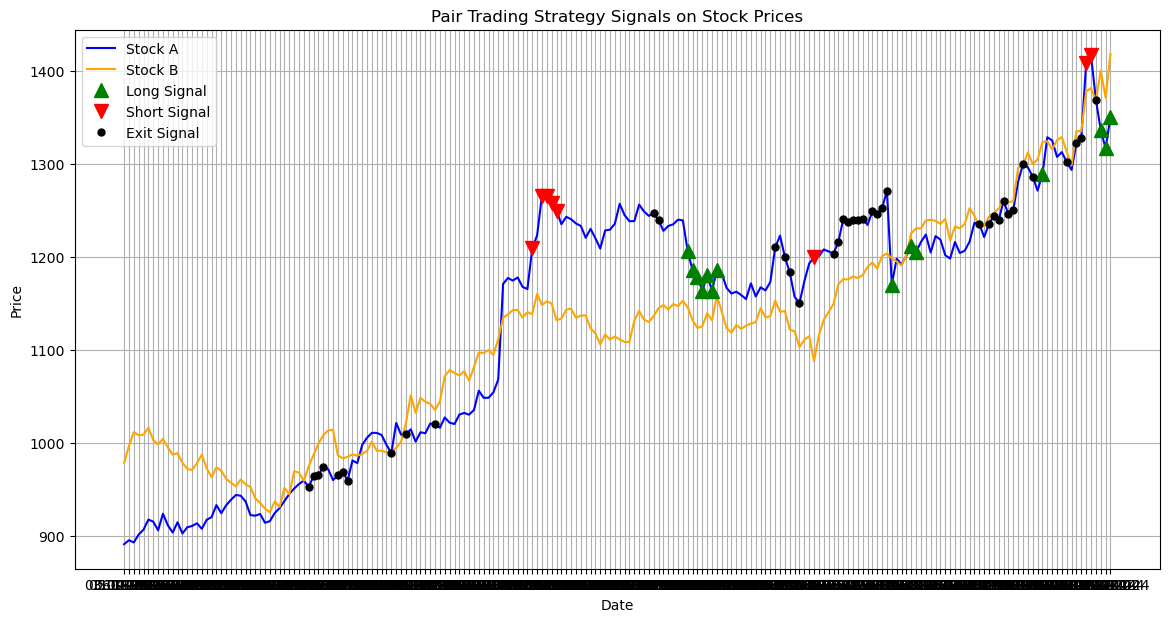

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the output CSV file
output_file_path = 'outputfile.csv'  # Replace with your output file path
data = pd.read_csv(output_file_path, parse_dates=['Date'])

# Step 2: Plot the prices of StockA and StockB
plt.figure(figsize=(14, 7))

plt.plot(data['Date'], data['StockA'], label='Stock A', color='blue')
plt.plot(data['Date'], data['StockB'], label='Stock B', color='orange')

# Step 3: Plot the Long, Short, and Exit signals
plt.plot(data.loc[data['Long'], 'Date'], data.loc[data['Long'], 'StockA'], '^', markersize=10, color='green', lw=0, label='Long Signal')
plt.plot(data.loc[data['Short'], 'Date'], data.loc[data['Short'], 'StockA'], 'v', markersize=10, color='red', lw=0, label='Short Signal')
plt.plot(data.loc[data['Exit'], 'Date'], data.loc[data['Exit'], 'StockA'], 'o', markersize=5, color='black', lw=0, label='Exit Signal')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Pair Trading Strategy Signals on Stock Prices')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


PLOTING THE DATES VS PROFITS IN A BAR GRAPH

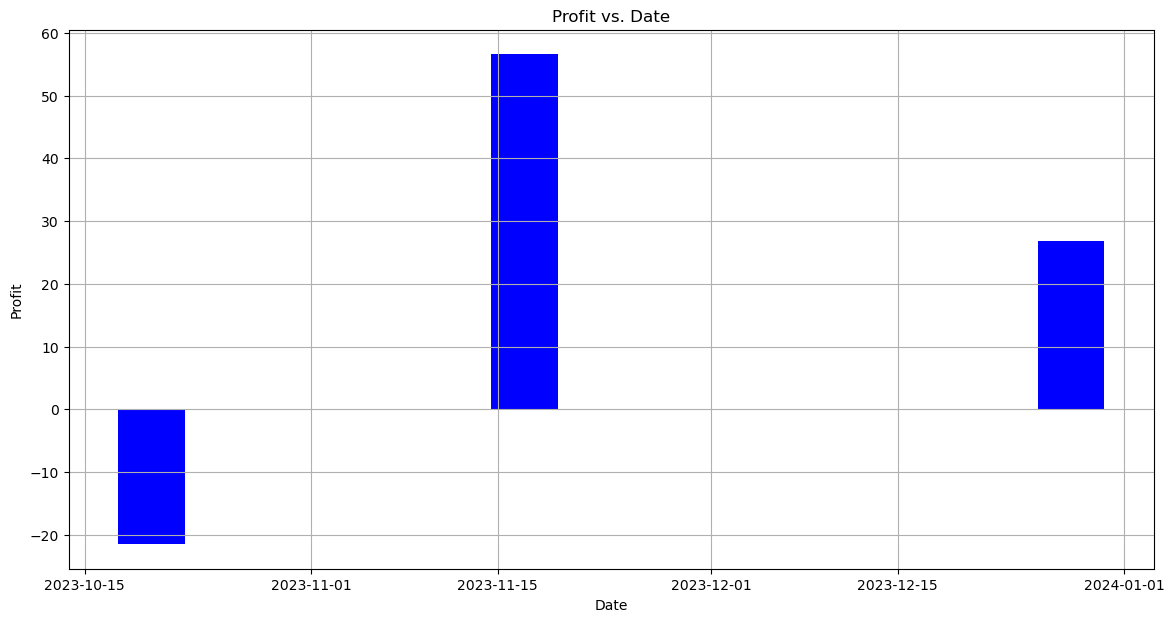

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file containing the trade history
trade_history_file_path = 'pairs_trading_trades.csv'  # Replace with your trade history file path
trade_history = pd.read_csv(trade_history_file_path, parse_dates=['Entry_Date', 'Exit_Date'])

# Step 2: Plot the profits vs. exit dates in a bar graph
plt.figure(figsize=(14, 7))
plt.bar(trade_history['Exit_Date'], trade_history['Profit'], color='blue', width=5)

plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Profit vs. Date')
plt.grid(True)

# Show the plot
plt.show()
